In [25]:
import numpy as np
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

- $n$ бусинок на веревке.
- Веревку вращают вокруг вертикальной оси с угловой скоростью $\omega = 2\pi\nu$, где $\nu$ - частота вращения, держа ее за верхний конец.
- Для простоты массы всех бусинок одинаковые и равны $m$.
- Сами бусинки пренебрежимо малы, они расположены на одинаковом расстоянии друг от друга, равном $l$.

На $i$-ую бусинку (нумерация сверху вниз) действуют:
- сила натяжения $T_i$, направленная к оси вращения, вверх, под углом $\alpha_i$ к горизонтали;
- сила натяжения $T_{i+1}$, направленная от оси вращения, вниз, под углом $\alpha_{i+1}$ к горизонтали
(силы натяжения, действующие на соседние бусинки со стороны друг друга равны по модулю и противоположны по направлению);
- сила тяжести $mg$, направленная вниз.
Исключение - нижняя $n$-ая бусинка, на которую не действует сила натяжения снизу ($T_{n+1} = 0$).

$i$-ая бусинка движется по окружности радиусом $r_i$ с центростремительным ускорением $\omega^2r_i$.

Учтем, что: $r_i = l\sum_{k=1}^i\cos\alpha_k$.

Таким образом получается $2n$ неизвестных величин: $T_1...T_n$, $\alpha_1...\alpha_n$.

Для каждой бусинки запишем 2 уравнения:
- II-ой закон Ньютона для горизонтальной оси: $T_i\cos\alpha_i - T_{i+1}\cos\alpha_{i+1} = m\omega^2r_i$
- II-ой закон Ньютона для вертикальной оси: $T_i\sin\alpha_i - T_{i+1}\sin\alpha_{i+1} - mg = 0$

Перевишем уравнения, перенеся все в левую часть и учитывая указанное соотношение:
- $T_i\cos\alpha_i - T_{i+1}\cos\alpha_{i+1} - m\omega^2l\sum_{k=1}^i\cos\alpha_k = 0$
- $T_i\sin\alpha_i - T_{i+1}\sin\alpha_{i+1} - mg = 0$

Порядок уравнений в системе: сначала все уравнения для горизонтальной оси, затем все для вертикальной. 

Порядок неизвестных в векторе: сначала все силы натяжения $T$, затем все углы наклона $\alpha$.

In [26]:
def get_r(alpha_arr: np.ndarray, l:float) -> float:
    return l * np.cumsum(np.cos(alpha_arr))

def get_h(alpha_arr: np.ndarray, l:float) -> float:
    return l * np.cumsum(np.sin(alpha_arr))

In [17]:
def fun(x: np.ndarray, m: float, omega: float, l: float, g: float) -> np.ndarray:
    # Returns left parts values of the system equations
    n = x.size // 2
    t_arr = x[:n]
    t_arr = np.concatenate((t_arr, np.array([0])))
    alpha_arr = x[n:]
    alpha_arr = np.concatenate((alpha_arr, np.array([0])))
    
    f = np.empty_like(x)
    f[:n] = (
        t_arr[:-1] * np.cos(alpha_arr[:-1])
        - t_arr[1:] * np.cos(alpha_arr[1:])
        - m * omega**2 * get_r(alpha_arr[:-1], l)
    )
    f[n:] = (
        t_arr[:-1] * np.sin(alpha_arr[:-1])
        - t_arr[1:] * np.sin(alpha_arr[1:])
        - m * g
    )
    return f

In [105]:
def main(n:int, m: float, nu: float, l: float, g: float):
    omega = 2 * np.pi * nu
    print(n, m, omega, l, g)
    x0 = np.concatenate((np.ones(n), np.ones(n)))
    res = fsolve(fun, x0, args=(m, omega, l, g))
    alpha_arr = res[n:]
    r_arr = get_r(alpha_arr, l)
    h_arr = get_h(alpha_arr, l)
    xx = np.concatenate((np.array([0]), r_arr))
    yy = np.concatenate((np.array([0]), -h_arr)) + h_arr.max()
    plt.plot(xx, yy, marker='o', ms=3)
    min_ = min(xx.min(), yy.min())
    max_ = max(xx.max(), yy.max())
    min_ = min_ - max_ * 0.1
    max_ = max_ * 1.1
    plt.xlim(-l * n, l * n)
    plt.ylim(-l, l * n)
    plt.title(f'n = {n}, nu = {nu}')
    plt.show()

Зафиксируем постоянные величины: массу бусинок, расстояние между ними и ускорение свободного падения

In [93]:
M = 0.01  # 10 g
L = 0.01  # 1 cm
G = 9.8

Изучим поведение нити при постоянной частоте 1 об/с и разном количестве бусинок

1 0.01 6.283185307179586 0.01 9.8


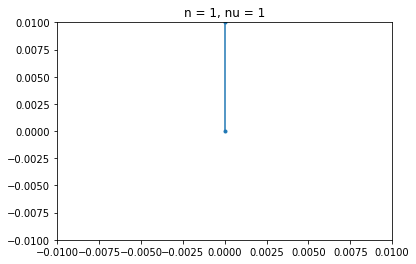

6 0.01 6.283185307179586 0.01 9.8


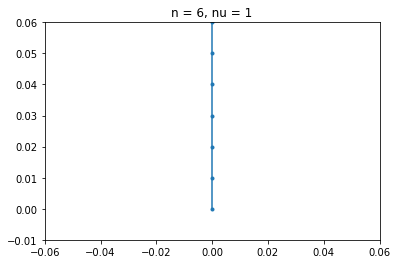

11 0.01 6.283185307179586 0.01 9.8


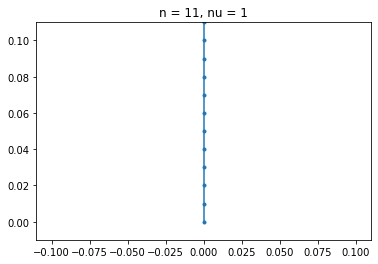

16 0.01 6.283185307179586 0.01 9.8


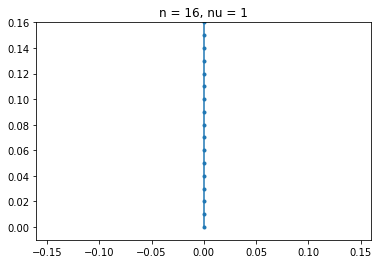

21 0.01 6.283185307179586 0.01 9.8


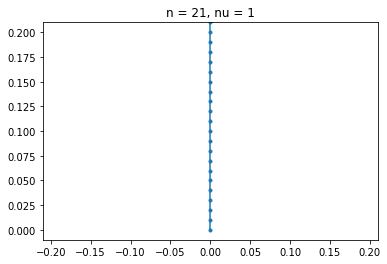

26 0.01 6.283185307179586 0.01 9.8


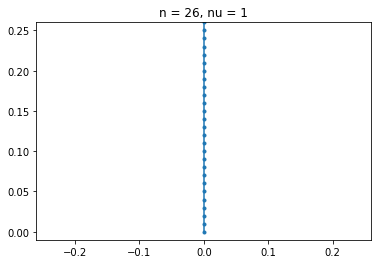

31 0.01 6.283185307179586 0.01 9.8


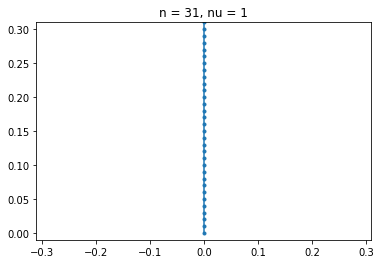

36 0.01 6.283185307179586 0.01 9.8


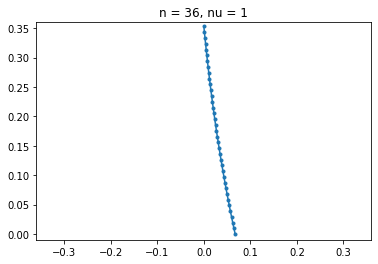

41 0.01 6.283185307179586 0.01 9.8


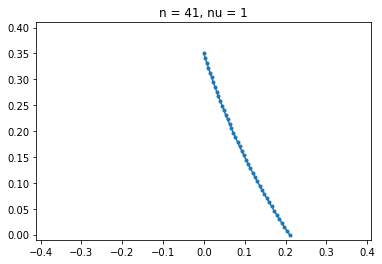

46 0.01 6.283185307179586 0.01 9.8


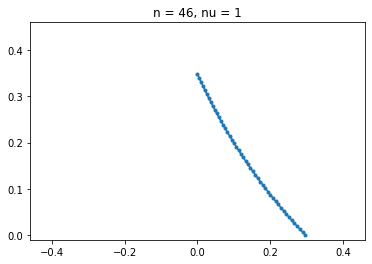

In [106]:
nu = 1
for n in range(1, 50, 5):
    main(n, M, nu, L, G)

Увеличим частоту до 5 об/мин и повторим эксперимент

1 0.01 31.41592653589793 0.01 9.8


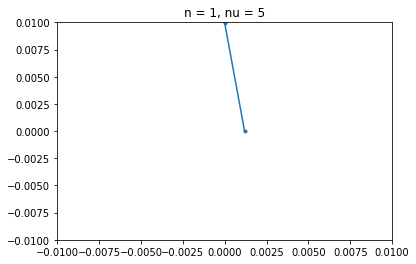

3 0.01 31.41592653589793 0.01 9.8


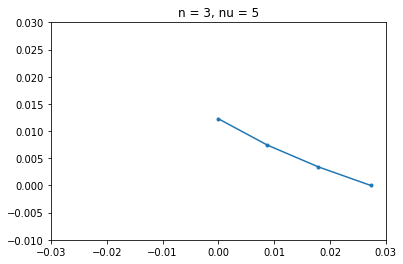

5 0.01 31.41592653589793 0.01 9.8


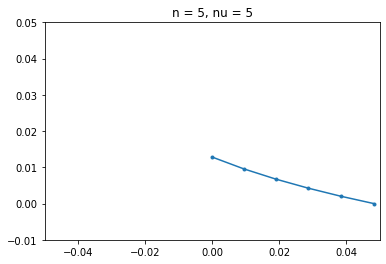

7 0.01 31.41592653589793 0.01 9.8


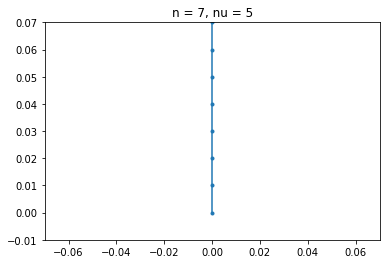

9 0.01 31.41592653589793 0.01 9.8


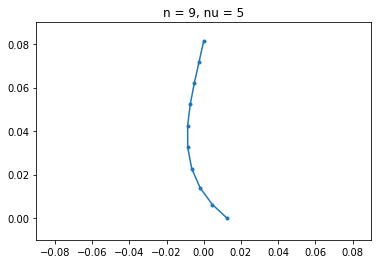

11 0.01 31.41592653589793 0.01 9.8


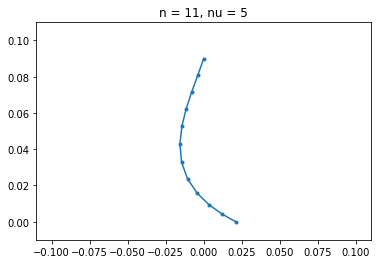

13 0.01 31.41592653589793 0.01 9.8


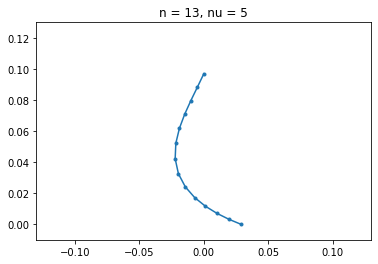

15 0.01 31.41592653589793 0.01 9.8


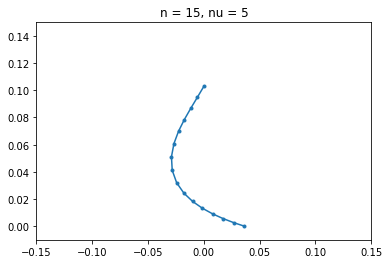

17 0.01 31.41592653589793 0.01 9.8


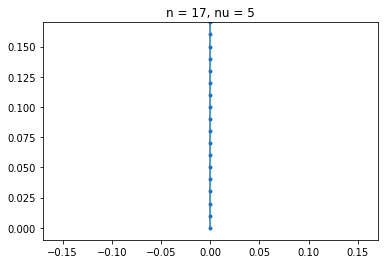

19 0.01 31.41592653589793 0.01 9.8


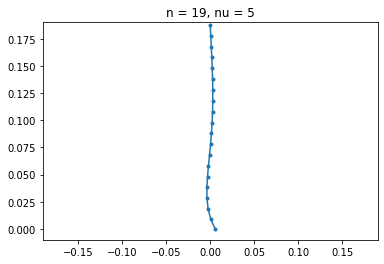

21 0.01 31.41592653589793 0.01 9.8


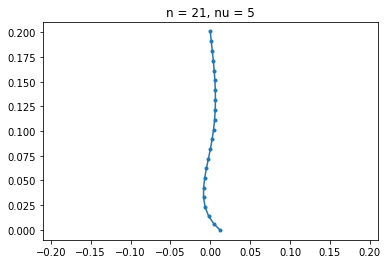

23 0.01 31.41592653589793 0.01 9.8


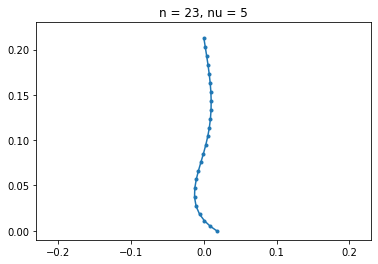

25 0.01 31.41592653589793 0.01 9.8


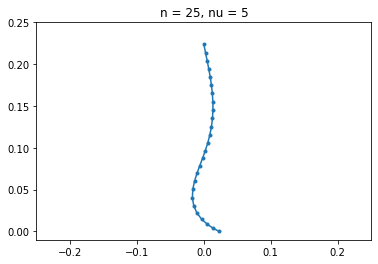

27 0.01 31.41592653589793 0.01 9.8


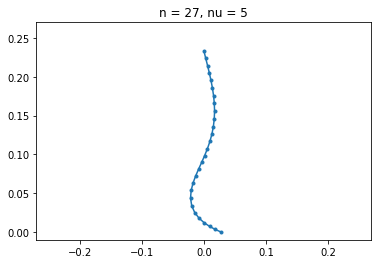

29 0.01 31.41592653589793 0.01 9.8


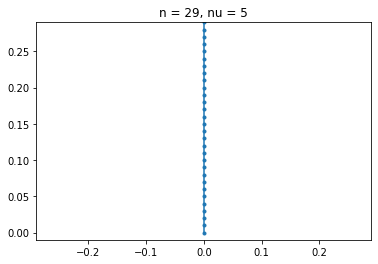

31 0.01 31.41592653589793 0.01 9.8


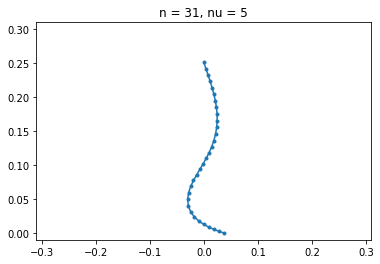

33 0.01 31.41592653589793 0.01 9.8


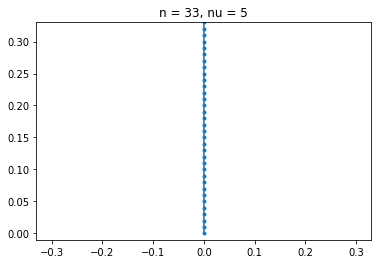

35 0.01 31.41592653589793 0.01 9.8


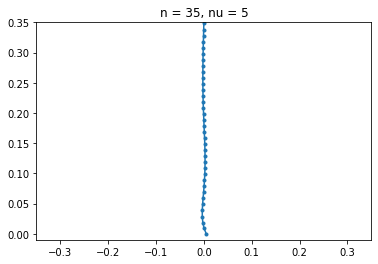

37 0.01 31.41592653589793 0.01 9.8


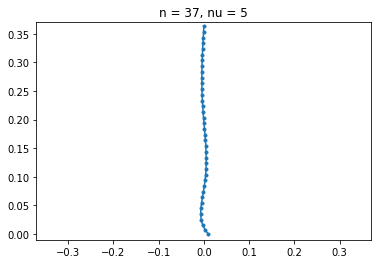

39 0.01 31.41592653589793 0.01 9.8


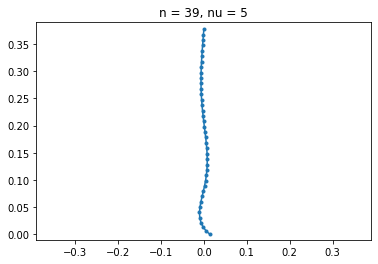

41 0.01 31.41592653589793 0.01 9.8


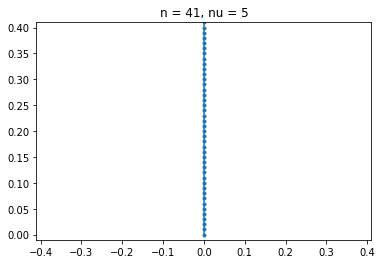

43 0.01 31.41592653589793 0.01 9.8


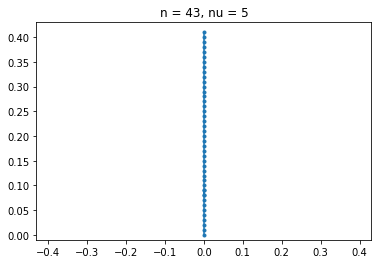

45 0.01 31.41592653589793 0.01 9.8


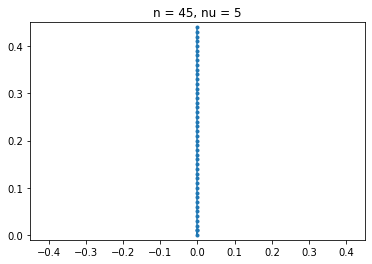

47 0.01 31.41592653589793 0.01 9.8


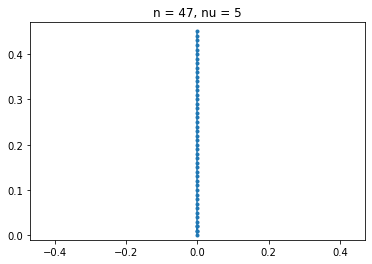

49 0.01 31.41592653589793 0.01 9.8


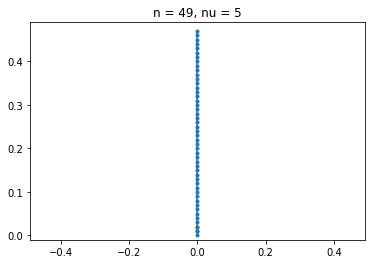

In [107]:
nu = 5

for n in range(1, 50, 2):
    main(n, M, nu, L, G)

Увеличим частоту до 10 об/мин и повторим эксперимент

1 0.01 62.83185307179586 0.01 9.8


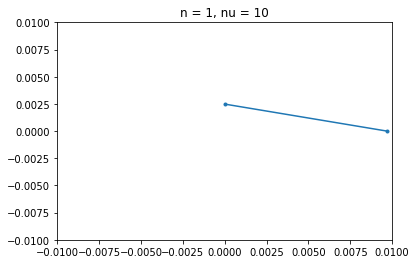

3 0.01 62.83185307179586 0.01 9.8


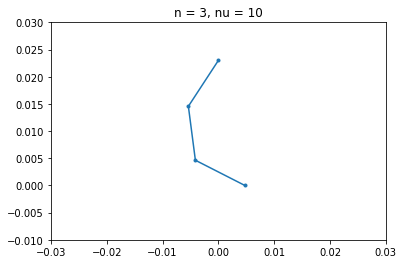

5 0.01 62.83185307179586 0.01 9.8


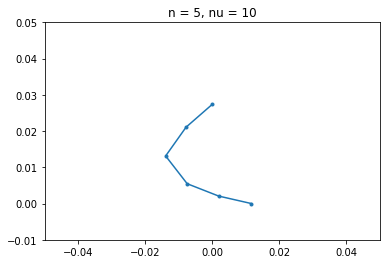

7 0.01 62.83185307179586 0.01 9.8


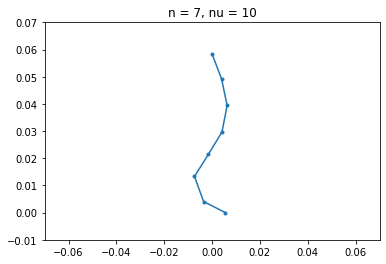

9 0.01 62.83185307179586 0.01 9.8


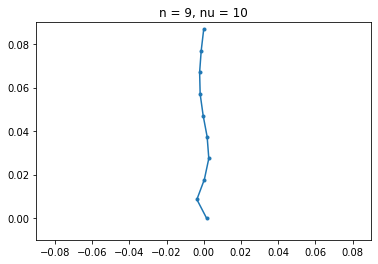

11 0.01 62.83185307179586 0.01 9.8


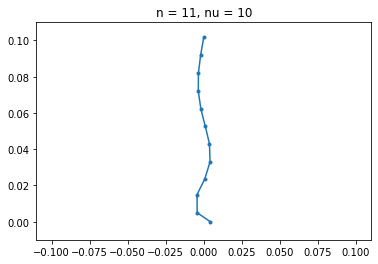

13 0.01 62.83185307179586 0.01 9.8


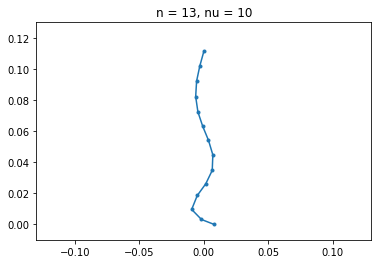

15 0.01 62.83185307179586 0.01 9.8


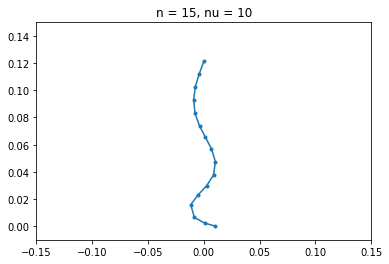

17 0.01 62.83185307179586 0.01 9.8


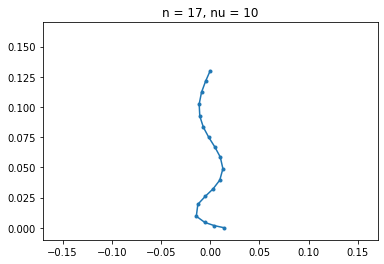

19 0.01 62.83185307179586 0.01 9.8


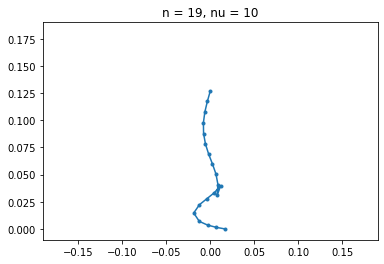

21 0.01 62.83185307179586 0.01 9.8


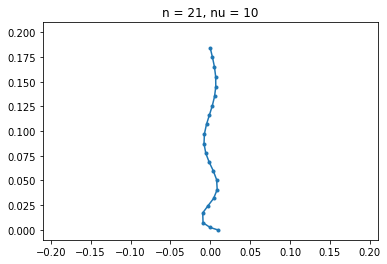

23 0.01 62.83185307179586 0.01 9.8


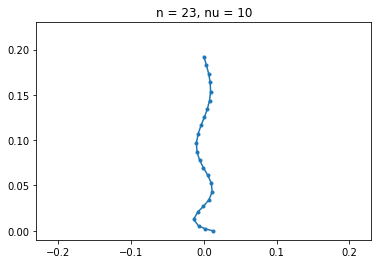

25 0.01 62.83185307179586 0.01 9.8


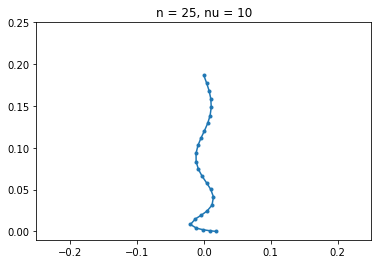

27 0.01 62.83185307179586 0.01 9.8


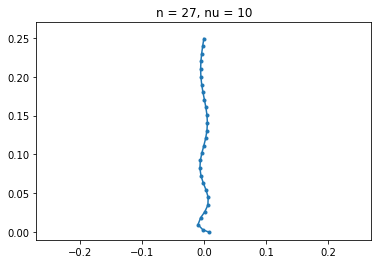

29 0.01 62.83185307179586 0.01 9.8


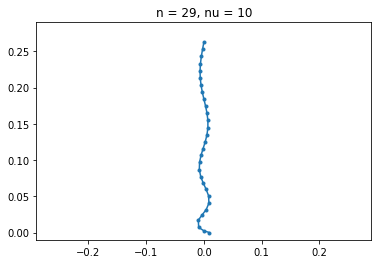

31 0.01 62.83185307179586 0.01 9.8


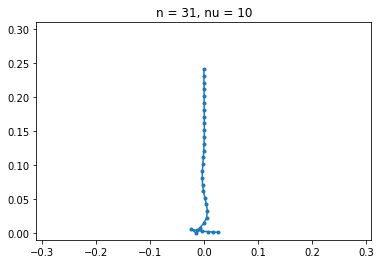

33 0.01 62.83185307179586 0.01 9.8


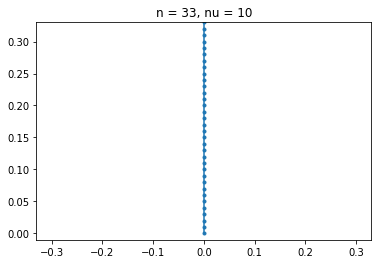

35 0.01 62.83185307179586 0.01 9.8


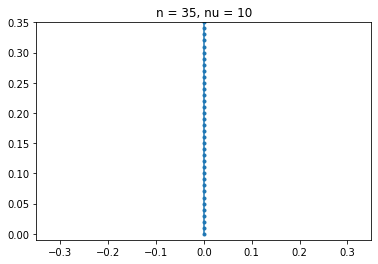

37 0.01 62.83185307179586 0.01 9.8


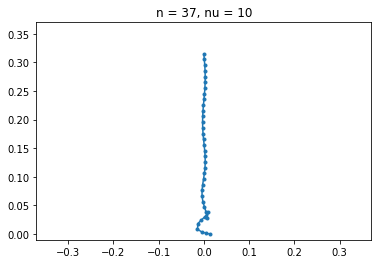

39 0.01 62.83185307179586 0.01 9.8


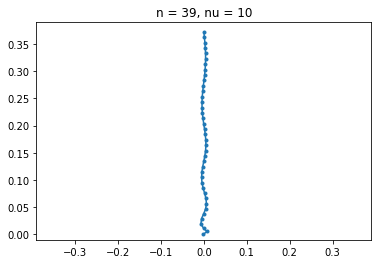

41 0.01 62.83185307179586 0.01 9.8


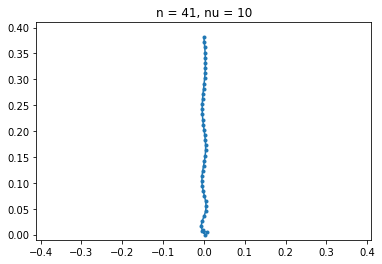

43 0.01 62.83185307179586 0.01 9.8


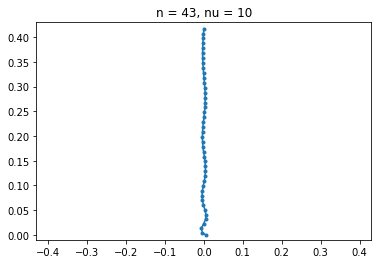

45 0.01 62.83185307179586 0.01 9.8


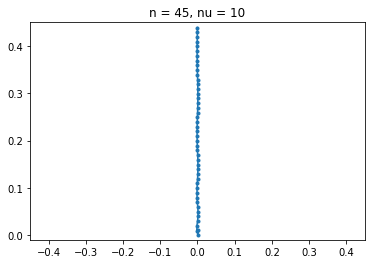

47 0.01 62.83185307179586 0.01 9.8


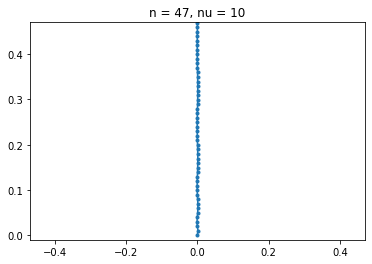

49 0.01 62.83185307179586 0.01 9.8


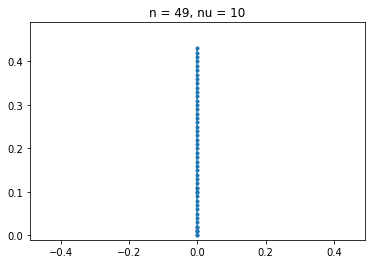

In [108]:
nu = 10

for n in range(1, 50, 2):
    main(n, M, nu, L, G)

Теперь зафиксируем число бусинок как 20 шт. и будем менять частоту вращения

20 0.01 6.283185307179586 0.01 9.8


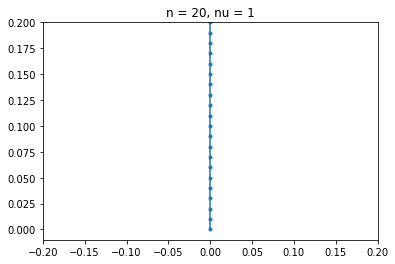

20 0.01 12.566370614359172 0.01 9.8


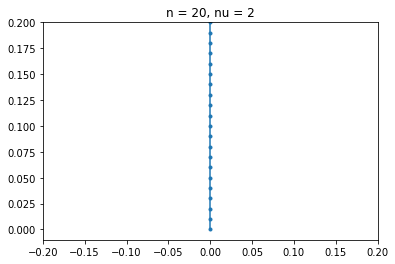

20 0.01 18.84955592153876 0.01 9.8


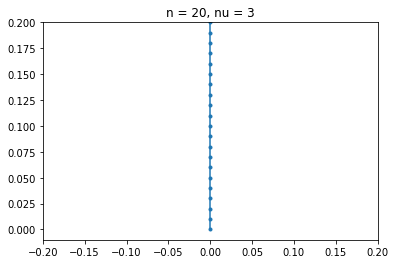

20 0.01 25.132741228718345 0.01 9.8


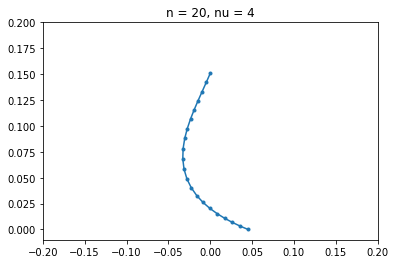

20 0.01 31.41592653589793 0.01 9.8


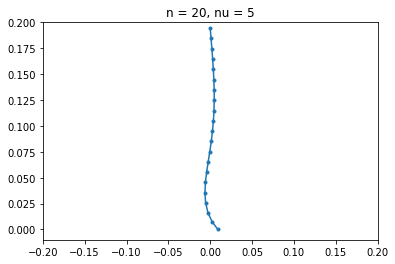

20 0.01 37.69911184307752 0.01 9.8


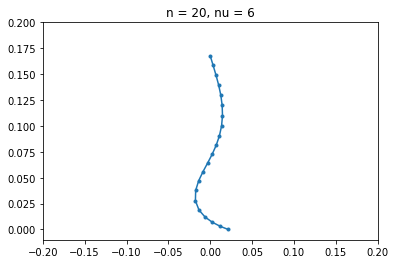

20 0.01 43.982297150257104 0.01 9.8


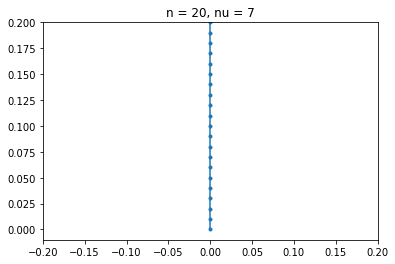

20 0.01 50.26548245743669 0.01 9.8


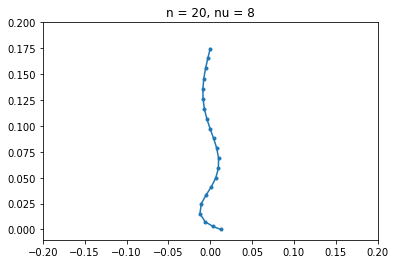

20 0.01 56.548667764616276 0.01 9.8


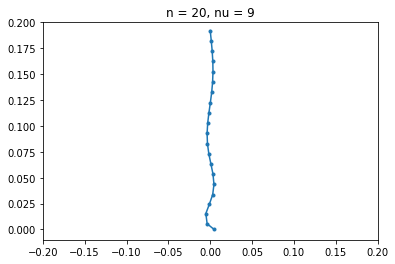

20 0.01 62.83185307179586 0.01 9.8


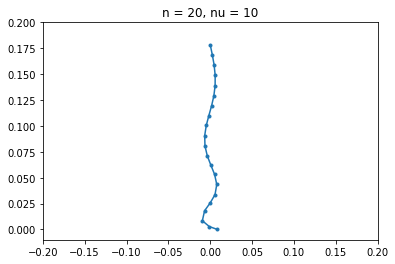

20 0.01 69.11503837897544 0.01 9.8


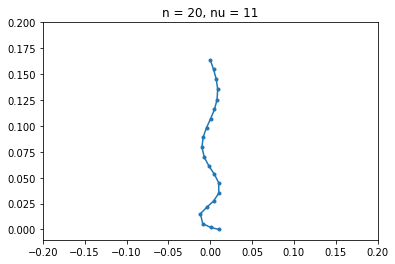

20 0.01 75.39822368615503 0.01 9.8


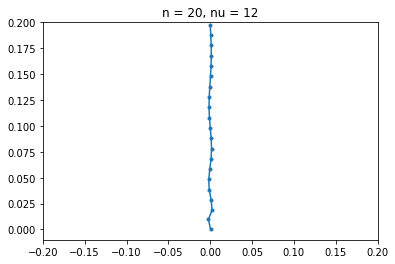

20 0.01 81.68140899333463 0.01 9.8


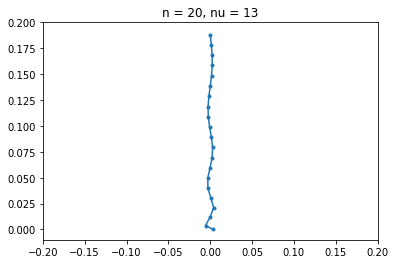

20 0.01 87.96459430051421 0.01 9.8


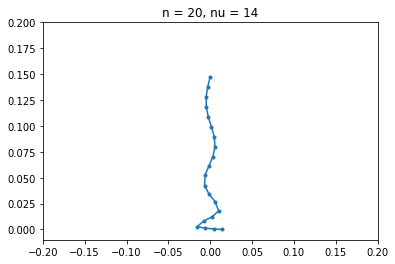

20 0.01 94.24777960769379 0.01 9.8


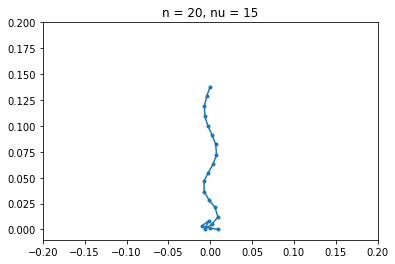

20 0.01 100.53096491487338 0.01 9.8


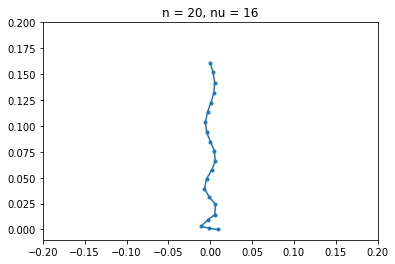

20 0.01 106.81415022205297 0.01 9.8


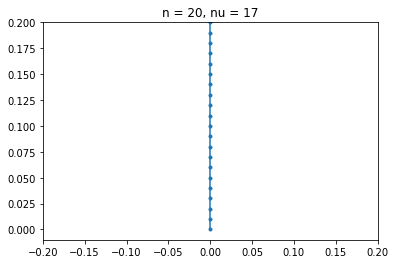

20 0.01 113.09733552923255 0.01 9.8


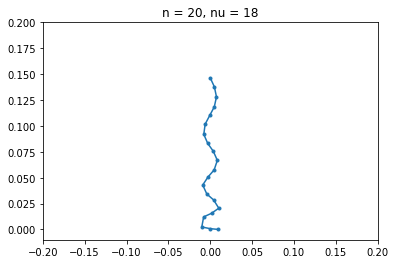

20 0.01 119.38052083641213 0.01 9.8


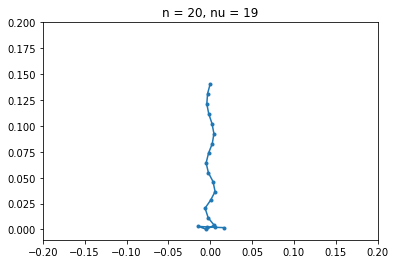

In [109]:
n = 20
for nu in range(1, 20):
    main(n, M, nu, L, G)